## Climate Data-Base from CONCITO

**## Exploratery Analysis (EDA)**

In [331]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [332]:
# Importing the required libaries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
import warnings
warnings.filterwarnings("ignore")
# Import data
#data_link= "/ClimateData.xlsx"
data_link= "https://denstoreklimadatabase.dk/sites/klimadatabasen.dk/files/media/document/Results_FINAL_20210201v4.xlsx"


In [3]:
# Loading the data into the data-frame
col_names= ["id", "Product_dk", "Category_dk", "Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g", "Data_Source", "Comments", "GPC_Level4_en", "ID_Food", "ID_Pack", "ID_Retail", "GPC_Category_en", "GPC_Category_dk", "GPC_Level4_dk", "product_type", "GPC_level1", "Food_group", "GPC_level2", "Un/Processed", "GPC_Level3", "Extra_category"]
# Read data with Pandas as Excel.
# Original columns name are replaced with ralavant names (col_names)
data= pd.read_excel(data_link, sheet_name=1, index_col=False, header=None, skiprows=1, names= col_names).round(decimals = 2)
data.head(3)

,id,Product_dk,Category_dk,Product_en,Category_en,Unit,Agriculture,iLUC,Processing,Packaging,...,GPC_Category_en,GPC_Category_dk,GPC_Level4_dk,product_type,GPC_level1,Food_group,GPC_level2,Un/Processed,GPC_Level3,Extra_category
0,Ra00001,"Peberfrugt, rød, rå",Grøntsager,"Pepper, sweet, red, raw",Vegetables,kg,0.25,0.03,0.0,0.14,...,Vegetables,Grøntsager,10006191,Square Tapering Sweet Peppers (Peg Top),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260400.0,Peppers
1,Ra00002,"Tomat, uspec., rå",Grøntsager,"Tomato, ripe, raw, origin unknown",Vegetables,kg,0.07,0.01,0.0,0.14,...,Vegetables,Grøntsager,10006165,Tomatoes – Round,50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260300.0,Tomatoes
2,Ra00003,"Squash, rå",Grøntsager,"Squash, raw",Vegetables,kg,0.14,0.04,0.0,0.06,...,Vegetables,Grøntsager,10006355,Squash (Calabaza),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260700.0,Cucurbits – Edible Peel


In [4]:
# How big is the dataset (no of Rows, no of Columns)
shape=data.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in this dataset!')

There are 500 rows and 33 columns in this dataset!


***Let´s have a look dataset with only selected columns that make sense***

In [5]:
# cols_to_use= ["Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carbohydrate_g", "Protein_g", "ID_Food", "ID_Pack", "ID_Retail", "product_type", "GPC_level1", "GPC_level2", "GPC_Level3"]
cols_to_use= ["Product_en", "Category_en", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g"]

selected_data= data.loc[:, cols_to_use].round(decimals = 2)
selected_data.head()


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
0,"Pepper, sweet, red, raw",Vegetables,0.25,0.03,0.0,0.14,0.58,0.01,1.02,133.0,0.1,5.2,0.9
1,"Tomato, ripe, raw, origin unknown",Vegetables,0.07,0.01,0.0,0.14,0.48,0.01,0.70,87.0,0.1,3.2,0.8
2,"Squash, raw",Vegetables,0.14,0.04,0.0,0.06,0.58,0.01,0.83,81.0,0.2,2.4,1.4
3,"Aubergine, raw",Vegetables,0.16,0.02,0.0,0.14,0.65,0.01,0.97,83.0,0.1,3.1,0.9
4,"Tomato, dried",Vegetables,0.91,0.09,-0.0,0.26,0.68,0.01,1.95,1187.0,3.0,43.5,14.1


In [6]:
# Checking the type of data in each Columns
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_en       500 non-null    object 
 1   Category_en      500 non-null    object 
 2   Agriculture      500 non-null    float64
 3   iLUC             500 non-null    float64
 4   Processing       500 non-null    float64
 5   Packaging        500 non-null    float64
 6   Transport        500 non-null    float64
 7   Retail           500 non-null    float64
 8   Total_CO2_eq/kg  500 non-null    float64
 9   Energy_KJ        500 non-null    float64
 10  Fat_g            500 non-null    float64
 11  Carb_g           500 non-null    object 
 12  Protein_g        500 non-null    object 
dtypes: float64(9), object(4)
memory usage: 50.9+ KB



***"Carb_g" and "Protein_g" columns are object type so they need to changed to "float64" type***


In [7]:
# Change column from "Object" type to "Float" type.
selected_data['Carb_g'] = pd.to_numeric(selected_data['Carb_g'], errors = 'coerce')
selected_data['Protein_g'] = pd.to_numeric(selected_data['Protein_g'], errors = 'coerce')
# Lets check the change
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_en       500 non-null    object 
 1   Category_en      500 non-null    object 
 2   Agriculture      500 non-null    float64
 3   iLUC             500 non-null    float64
 4   Processing       500 non-null    float64
 5   Packaging        500 non-null    float64
 6   Transport        500 non-null    float64
 7   Retail           500 non-null    float64
 8   Total_CO2_eq/kg  500 non-null    float64
 9   Energy_KJ        500 non-null    float64
 10  Fat_g            500 non-null    float64
 11  Carb_g           499 non-null    float64
 12  Protein_g        499 non-null    float64
dtypes: float64(11), object(2)
memory usage: 50.9+ KB


**After change data-type object to float, one of each row from "Carb_g" and "Protein_g" are missing.**

**So lets have a look them to undestand and replace them** 

In [8]:
#  let look what is the missing value to understand it
is_NaN = selected_data[["Carb_g", "Protein_g"]].isnull()
row_has_NaN = is_NaN.any(axis=1)
selected_data[row_has_NaN]


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
49,"Pork, flank, spiced, cooked",Meat/poultry,2.5,0.43,0.32,0.02,0.1,0.0,3.38,854.0,22.8,NaN,NaN


In [9]:
# We Have found that row 49 have NaN value in the two columns. 
# To figureout how to replace these NaN value in row 49, let have a look other neighboring rows.
selected_data[47:51]

,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
47,"Pork, sausage, Danish, raw",Meat/poultry,1.57,0.27,0.13,0.14,0.10,0.0,2.21,907.0,17.4,4.7,12.2
48,"Pork, liver paste, Danish",Meat/poultry,1.68,0.31,0.22,1.18,0.13,0.0,3.51,989.0,19.2,4.7,11.3
49,"Pork, flank, spiced, cooked",Meat/poultry,2.50,0.43,0.32,0.02,0.10,0.0,3.38,854.0,22.8,NaN,NaN
50,"Pork sausage, Thüringer bratwurst",Meat/poultry,1.14,0.20,0.37,0.02,0.09,0.0,1.81,1172.0,24.5,1.1,14.4


In [10]:
# After looking other similar rows, NaN value can be replaced with average of these rows
#selected_data[["Carb_g", 'Protein_g']][49:50].replace(np.nan, 0)
#selected_data[["Carb_g", 'Protein_g']].iloc[49:50]
#selected_data.info()

# I could not change or replace NaN value with replace() or fillna() method, which i would like to replace with 3.5 and 13.0. So i use inefficient method.
selected_data["Carb_g"].iloc[49:50]= 3.5
selected_data['Protein_g'].iloc[49:50]= 13.0
selected_data[["Carb_g", 'Protein_g']].iloc[49:50]
#"""Everything look okey by now"""

,Carb_g,Protein_g
49,3.5,13.0


In [11]:
# To overview the statistic on Dataset/Columns
selected_data.describe().round(decimals = 2)

,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,2.21,0.59,1.01,0.34,0.25,0.01,4.41,821.45,10.00,15.85,8.25
std,8.67,1.73,2.57,0.52,0.24,0.01,9.96,710.61,16.27,21.68,7.86
min,-0.00,-0.09,-8.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.04,0.00,0.14,0.11,0.00,0.94,254.25,0.50,1.38,1.40
50%,0.34,0.14,0.21,0.22,0.12,0.01,1.87,635.00,2.95,5.65,5.90
75%,0.98,0.45,0.94,0.41,0.38,0.01,3.64,1210.25,12.92,20.05,14.02
max,133.45,25.85,14.51,6.55,2.07,0.03,151.95,3700.00,100.00,99.90,36.30


In [12]:
# Now lets have a look, how many categories are there!
unique_value = selected_data["Category_en"].unique()
print("-----"*10)
print(f"There are {len(unique_value)} different categories:")
print(list(unique_value))

--------------------------------------------------
There are 13 different categories:
['Vegetables', 'Meat/poultry', 'Beverages', 'Bread/bakery products', 'Cereal/grain/pulse products', 'Milk/eggs/substitute products', 'Seasonings/preservatives/extracts', 'Seafood', 'Fruit/vegetable products', 'Candy/sugar products', 'Prepared/preserved foods', 'Fruits', 'Oils/fats edible']


In [13]:
# Inspect the numbers of rows for each category from "Category_en" columns
selected_data['Category_en'].value_counts()

Fruit/vegetable products             75
Meat/poultry                         62
Prepared/preserved foods             61
Vegetables                           56
Seafood                              51
Bread/bakery products                34
Beverages                            32
Seasonings/preservatives/extracts    32
Milk/eggs/substitute products        31
Fruits                               27
Cereal/grain/pulse products          22
Candy/sugar products                 13
Oils/fats edible                      4
Name: Category_en, dtype: int64

In [14]:
# Inspect the smallest & largest values in the columns
selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nsmallest(5, ["Total_CO2_eq/kg"])


,Total_CO2_eq/kg
Product_en,
"Water, tap, drinking, average values",0.00
"Mussel, raw",0.22
"Water, bottled, carbonated",0.22
"Brussels sprouts, raw",0.25
"Cabbage, Chinese, pak-choi, raw",0.25


In [15]:
selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nlargest(5, ["Total_CO2_eq/kg"])

,Total_CO2_eq/kg
Product_en,
"Beef, fillet, defatted, raw",151.95
"Beef, T-bone steak, raw",80.89
"Veal, medium fat, raw",50.36
"Roastbeef, sliced",45.84
"Beef, rump, raw",45.69


"Beef, fillet, defatted, raw" row have very high difference with other row. so during the EDA process this row is counted as outlier. to have better overview and analytics, this row should be dropped.

---

On the other hand "Water, tap, drinking, average values" row have 0 value so, we have no use of this row, so also will dorp this row.

In [60]:
to_drop1= selected_data[selected_data["Product_en"] == "Water, tap, drinking, average values"].index
to_drop2= selected_data[selected_data["Product_en"] == "Beef, fillet, defatted, raw"].index
to_drop= [to_drop1[0], to_drop2[0]]
to_drop
selected_dropped_data= selected_data.drop(labels=to_drop, inplace=False)
print(selected_dropped_data.shape)
"""Just to check the shape of the data"""

(498, 13)


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
0,"Pepper, sweet, red, raw",Vegetables,0.25,0.03,0.0,0.14,0.58,0.01,1.02,133.0,0.1,5.2,0.9
1,"Tomato, ripe, raw, origin unknown",Vegetables,0.07,0.01,0.0,0.14,0.48,0.01,0.70,87.0,0.1,3.2,0.8
2,"Squash, raw",Vegetables,0.14,0.04,0.0,0.06,0.58,0.01,0.83,81.0,0.2,2.4,1.4
3,"Aubergine, raw",Vegetables,0.16,0.02,0.0,0.14,0.65,0.01,0.97,83.0,0.1,3.1,0.9
4,"Tomato, dried",Vegetables,0.91,0.09,-0.0,0.26,0.68,0.01,1.95,1187.0,3.0,43.5,14.1


In [17]:
# Group some of the elements from columns with categorical data
df_with_category=selected_dropped_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)
df_with_category

,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg
Category_en,,,,,,,
Meat/poultry,11.05,2.27,-0.59,0.20,0.20,0.00,13.14
Seafood,0.07,1.03,7.14,0.55,0.19,0.00,8.98
Oils/fats edible,1.56,0.57,0.76,0.48,0.21,0.01,3.59
Candy/sugar products,1.35,0.29,1.29,0.45,0.14,0.01,3.53
Prepared/preserved foods,1.41,0.34,0.62,0.43,0.13,0.01,2.93
Seasonings/preservatives/extracts,0.54,0.26,1.08,0.71,0.21,0.01,2.81
Milk/eggs/substitute products,1.52,0.20,0.72,0.22,0.11,0.00,2.78
Beverages,0.74,0.34,0.26,0.69,0.54,0.01,2.58
Bread/bakery products,0.72,0.18,0.92,0.27,0.13,0.01,2.22


***Data Visualization***

'There are no missing value by now'

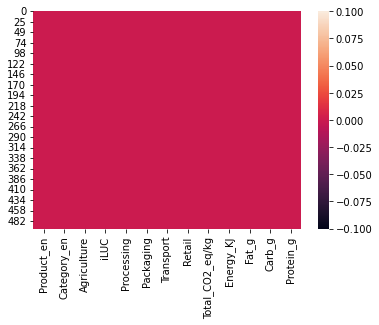

In [18]:
# To cheeck missing value
sns.heatmap(selected_dropped_data.isnull())

"""There are no missing value by now"""

***Analyze indivisual columns***

> With the function below, we can easily analyze to visualize the distribution of the data , detection of the outliers





Mean: 1.9477510040160637
Median: 0.345
Missing value: 0
% of Missing values: 0.0


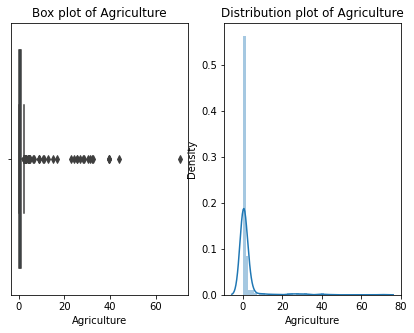

In [19]:
def plotchart(col):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (7, 5))
  sns.boxplot(col, orient="v", ax= ax1)
  ax1_set_ylabel= col.name
  ax1.set_title("Box plot of {}".format(col.name))
  sns.distplot(col, ax=ax2)
  ax2.set_title("Distribution plot of {}".format(col.name))

def analysis_column(col):
  #print("Count of outlier ", len(findoutliers(col)))
  print("Mean: {}".format(col.mean()))
  print("Median: {}".format(col.median()))
  print("Missing value: {}".format(col.isnull().sum()))
  print("% of Missing values: {}".format(round(100*(col.isnull().sum()/len(col)), 2)))
  plotchart(col)

analysis_column(selected_dropped_data["Agriculture"])

***Correlation between two variables***

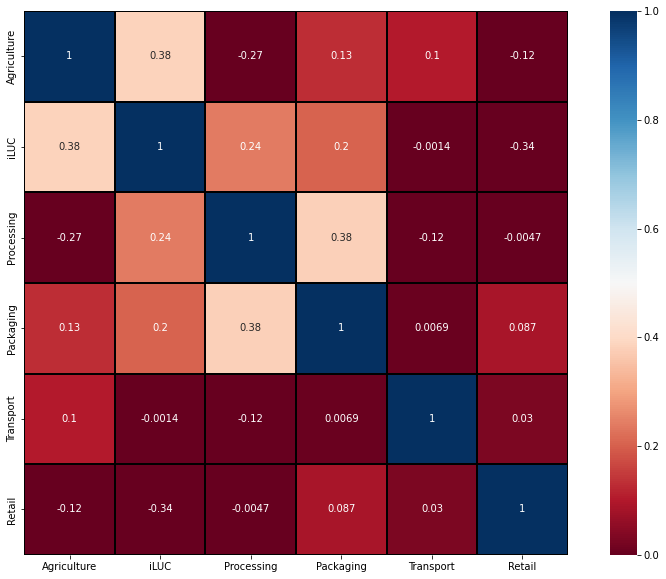

In [20]:
col= selected_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail']]
corr= col.corr(method="spearman")
corr
plt.figure(figsize=(15, 10))
sns.heatmap(corr, vmin=0, vmax=1, cmap= "RdBu", linewidths=1, square= True, annot= True, linecolor="black")

***From above we can see:***


*   *There is strong positive correlation between Packaging and Processing or iLUC and Agriculture*
*   *There is strong negetive correlation between iLuc and Retail or Processing and Agriculture*

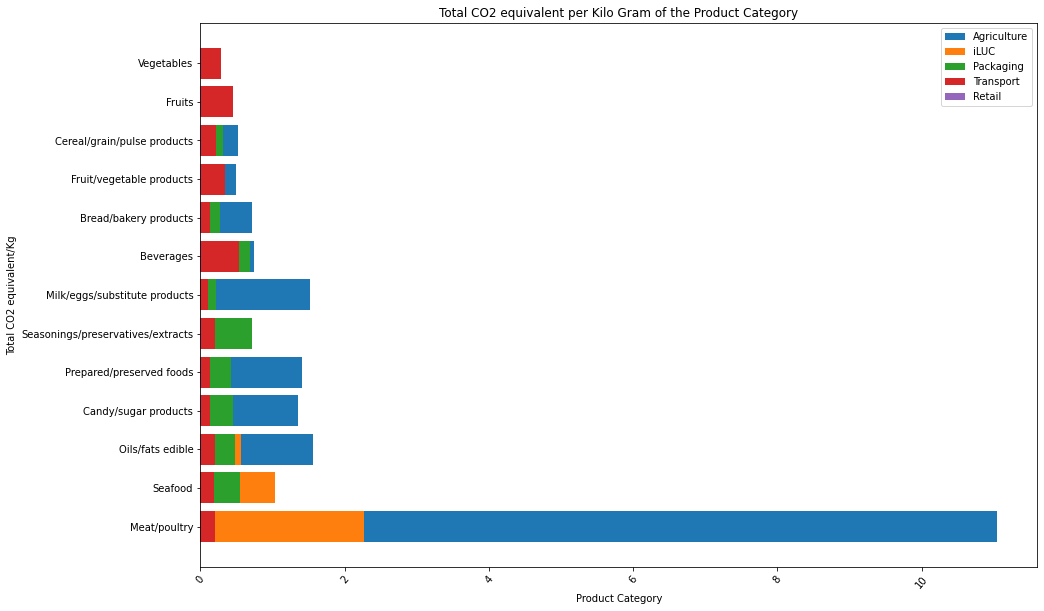

In [21]:
# Stacked bar plot
fig, ax= plt.subplots(figsize=(15, 10))

ax.barh(df_with_category.index, df_with_category['Agriculture'], label= "Agriculture")
ax.barh(df_with_category.index, df_with_category['iLUC'], label='iLUC')
ax.barh(df_with_category.index, df_with_category['Packaging'], label='Packaging')
ax.barh(df_with_category.index, df_with_category['Transport'], label='Transport')
ax.barh(df_with_category.index, df_with_category['Retail'], label='Retail')

plt.xticks(rotation=50)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")
ax.legend()

***From above we can see:***
*  *The Meat and Poultry category is the highest contributor of the total CO2  List item emission where most of the share come from Agriculture and then iLUC*
*  *Fruits and Vegetables are the least contributors of total CO2 emission and most of the share come from transportation*

***Its clear that Meat/Poultry category is the top contributor of the Total_CO2_eq/kg.***
---
*In addition,Agriculture is the one, which contributing that share of the Total_CO2_eq/kg, for most of the food categories*

Text(0, 0.5, 'Total CO2 equivalent/Kg')

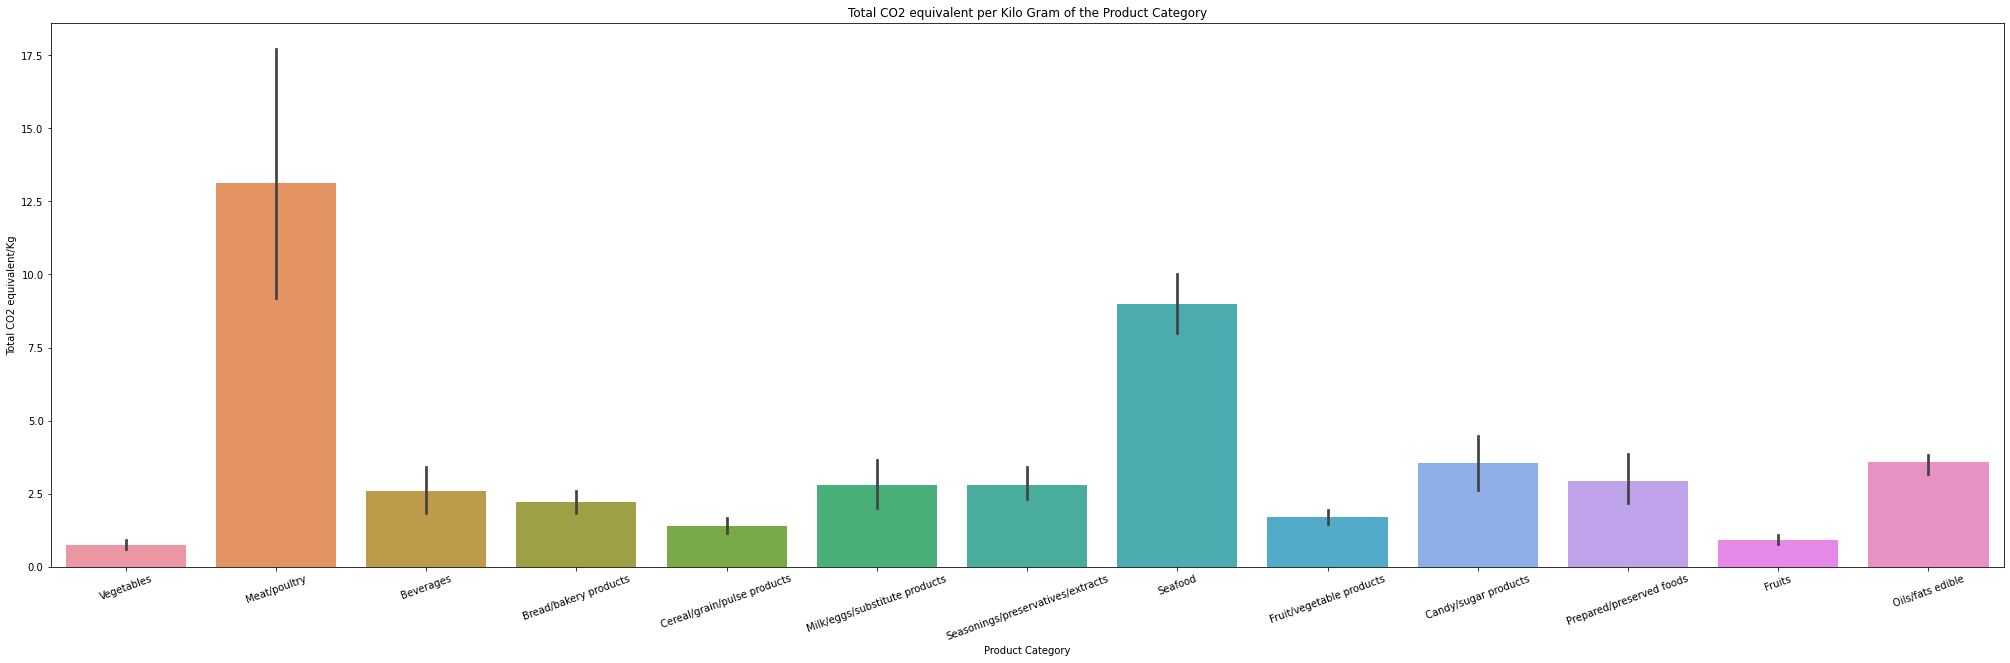

In [22]:
# Bar chart
fig, ax= plt.subplots(figsize=(35, 10))
sns.barplot(selected_dropped_data["Category_en"], selected_dropped_data["Total_CO2_eq/kg"])
plt.xticks(rotation=20)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")

**Data Modeling (Machine Learning)**

In [326]:
row_to_explore =  selected_dropped_data.sample().reset_index(drop=True)
row_to_explore 


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
0,"Pork, loin, lean, raw",Meat/poultry,3.33,0.58,-0.26,0.14,0.39,0.0,4.19,450.0,1.9,0.0,22.3


In [366]:
from colorama import Fore, Back, Style

name_choosen =  selected_dropped_data.sample().reset_index(drop=True)

print("*" * 60)
print(Fore.GREEN + f'Food product choosen: \t{name_choosen._get_value(0, "Product_en")}')
print("." * 40) 
print(Fore.RED + f'Food category releted to: \t{name_choosen._get_value(0, "Category_en")}')
print("." * 40)
print(Fore.GREEN + f'Total CO2 emission contribution:\t{name_choosen._get_value(0, "Total_CO2_eq/kg")}')
print(Style.RESET_ALL)
print(f'\t Agriculture = {name_choosen._get_value(0, "Agriculture")}, \n\t iLUC = {name_choosen._get_value(0, "iLUC")}, \n\t Processing = {name_choosen._get_value(0, "Processing")}, \n\t Packaging = {name_choosen._get_value(0, "Packaging")}, \n\t Transport = {name_choosen._get_value(0, "Transport")}, \n\t Retail = {name_choosen._get_value(0, "Retail")}')
print("." * 40)
print(Fore.GREEN + f'Total Energy_KJ: \t{name_choosen._get_value(0, "Energy_KJ")}')
print(Style.RESET_ALL)
print(f'\t Fat amount = {name_choosen._get_value(0, "Fat_g")}, \n\t Carb amount = {name_choosen._get_value(0, "Carb_g")}, \n\t Protein amount = {name_choosen._get_value(0, "Protein_g")}')
print("*" * 60)

************************************************************
Food product choosen: 	Cabbage, red, raw
........................................
Food category releted to: 	Vegetables
........................................
Total CO2 emission contribution:	0.25

	 Agriculture = 0.1, 
	 iLUC = 0.02, 
	 Processing = 0.0, 
	 Packaging = 0.06, 
	 Transport = 0.05, 
	 Retail = 0.01
........................................
Total Energy_KJ: 	133.0

	 Fat amount = 0.2, 
	 Carb amount = 4.0, 
	 Protein amount = 1.5
************************************************************
